In [149]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [150]:
pip install pandas

In [151]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt


Load Data

In [152]:
data_path = '/content/drive/My Drive/veri-seti.txt'


In [153]:
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(data_path, header=None, names=column_names, delimiter='\t')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Missed Data**

Replace With Median

In [154]:
missing_values_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in missing_values_columns:
    data[column] = data[column].replace(0, data[column].median())

Normalization

In [155]:
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(data.drop('Outcome', axis=1))
features_scaled_df = pd.DataFrame(features_scaled, columns=data.columns[:-1])

In [156]:
features_scaled_df['Outcome'] = data['Outcome']

PCA

In [157]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(features_scaled_df.drop('Outcome', axis=1))

LDA

In [158]:
lda = LDA(n_components=1)
X_lda = lda.fit_transform(features_scaled_df.drop('Outcome', axis=1), features_scaled_df['Outcome'])


In [159]:
print("Explained Variance by PCA Components:", pca.explained_variance_ratio_)
print("LDA Coefficients:", lda.coef_)


Explained Variance by PCA Components: [0.34239081 0.21521889]
LDA Coefficients: [[ 2.24748407  6.69896188 -0.87296533 -0.21218501 -1.27912803  4.80242255
   2.08489287  0.76524607]]


The explained variance values by the PCA components indicate that the first component  accounts for approximately 34.23% and the second component  for about 21.52% of the total variability in the data. Together, these two components explain around 55.75% of the total variance, suggesting that they can be useful for subsequent analyses.
The discriminant coefficients in LDA demonstrate the effectiveness of each feature in separating the two distinct classes. The discriminant coefficients found in LDA reflect the importance of each feature for class separation. Features with large coefficients, either positive or negative, have the most significant impact on class separation. Here, the second feature, namely **Glucose**, is the most important for differentiating between classes.

Spilit to train and test

In [160]:
X = features_scaled_df.drop('Outcome', axis=1)
y = features_scaled_df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## **Training models and evaluations**

### **Multiple Linear Regression**

In [161]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


LinearRegression()

**Prediction**

In [162]:
y_pred_linear = linear_model.predict(X_test)

**Evaluation**

MSE

In [163]:
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f'MSE for Linear Regression: {mse_linear}')


MSE for Linear Regression: 0.17336626475879852


 The value indicates the model's error rate in predicting outcomes using linear regression.The lower this value, the more accurate the model is in its predictions.

### **Multinominal Logistic Regression**
  

In [164]:
logistic_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
logistic_model.fit(X_train, y_train)


LogisticRegression(multi_class='multinomial')

**Prediction**

In [165]:
y_pred_logistic = logistic_model.predict(X_test)

ROC Curve

In [166]:
y_scores = logistic_model.predict_proba(X_test)[:, 1]

In [167]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores)


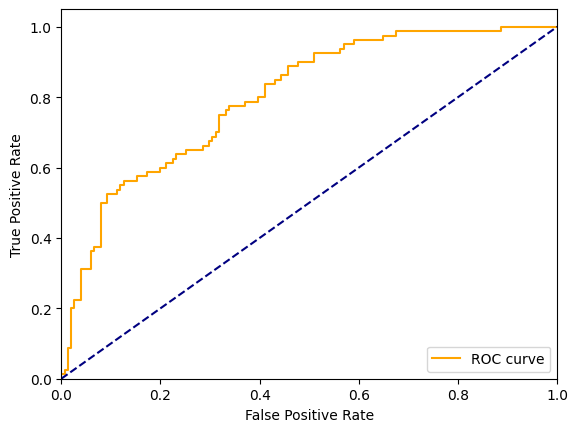

In [168]:
plt.figure()
plt.plot(fpr, tpr, color='orange', label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


The orange line represents the ROC curve of the model. This curve demonstrates the model's ability to distinguish between two classes (typically positive and negative). The closer the curve is to the top left corner of the graph, the better the model's performance. In this graph, the ROC curve lies above the line of randomness, indicating a performance better than random chance.

**Evaluation**

Classification Report

In [169]:
class_report_logistic = classification_report(y_test, y_pred_logistic)
print(class_report_logistic)


              precision    recall  f1-score   support

           0       0.79      0.84      0.81       151
           1       0.66      0.57      0.61        80

    accuracy                           0.75       231
   macro avg       0.72      0.71      0.71       231
weighted avg       0.74      0.75      0.74       231




- For class 0 (non-diabetic):

 **Precision:** Approximately 79% of the data predicted as class 0 truly belong to class 0. This high precision indicates the model's capability to correctly identify non-diabetic individuals.

 **Recall:** About 84% of the actual class 0 data has been correctly identified by the model. This demonstrates the model's ability to correctly recognize the majority of non-diabetic cases.

 **F1-Score:** This metric, which is around 81%, shows a good balance between precision and recall, suggesting a well-balanced capability of the model for accurate and comprehensive detection.


- For class 1 (diabetic):

 **Precision:** About 66% of the data predicted as class 1 truly belong to class 1. The lower precision might indicate challenges in accurately identifying diabetic cases.

 **Recall:** Around 57% of the actual class 1 data have been correctly identified by the model, which suggests that the model has some limitations in detecting all diabetic cases.

 **F1-Score:** At approximately 61%, this score is indicative of a less balanced performance between precision and recall compared to class 0.

 **Overall Accuracy:** The model's general accuracy stands at about 75%, reflecting its overall quality in diagnosing diabetes. In essence, the model has been able to correctly classify about 75% of the cases.

Confusion Matrix

In [170]:
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
print(f'Confusion Matrix for Logistic Regression:\n{conf_matrix_logistic}')


Confusion Matrix for Logistic Regression:
[[127  24]
 [ 34  46]]


46 instances were correctly predicted as diabetic.

127 instances were correctly predicted as non-diabetic.

24 instances were incorrectly predicted as diabetic when they were actually non-diabetic.

34 instances were incorrectly predicted as non-diabetic when they were actually diabetic.

**Specificity** = 127/(127+24)= 0.8410596

Given the specificity value of approximately 0.841, or 84.1%, this means that the model is quite effective at identifying non-diabetic cases as non-diabetic. In other words, when the model predicts that a patient does not have diabetes, it is correct about 84.1% of the time.

### **Decision Tree**

In [171]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

**Prediction**

In [172]:
y_pred_dt = dt_model.predict(X_test)


ROC Curve

In [173]:
y_scores = dt_model.predict_proba(X_test)[:, 1]

In [174]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores)


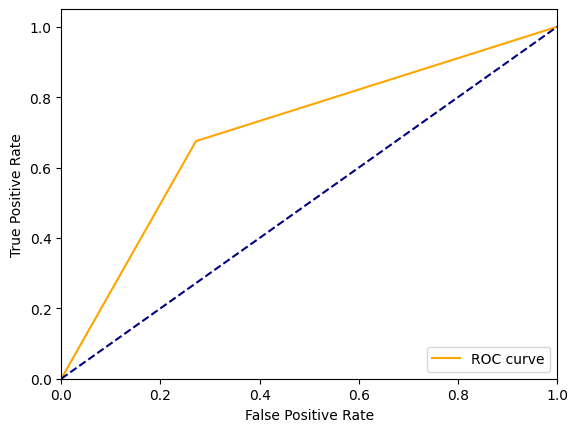

In [175]:
plt.figure()
plt.plot(fpr, tpr, color='orange', label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


**Evaluation**

Accuracy

In [176]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy: {accuracy_dt}')

Accuracy: 0.70995670995671


The model has correctly predicted 71% of all cases. In other words, out of every 100 test cases, the model has accurately identified 71 cases as either diabetic or non-diabetic.



Confusion Matrix

In [177]:
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print(f'Confusion Matrix:\n{conf_matrix_dt}')

Confusion Matrix:
[[110  41]
 [ 26  54]]


110 instances were correctly predicted as non-diabetic.

41 instances were incorrectly predicted as diabetic when they were actually non-diabetic.

26 instances were incorrectly predicted as non-diabetic when they were actually diabetic.

54 instances were correctly predicted as diabetic.

**Specificity** = 0.72847682

Given the specificity value of approximately 0.728 or 72.8%, this means that the model is quite effective at identifying non-diabetic cases as non-diabetic.




Classification Report

In [178]:
class_report_dt = classification_report(y_test, y_pred_dt)
print(class_report_dt)

              precision    recall  f1-score   support

           0       0.81      0.73      0.77       151
           1       0.57      0.68      0.62        80

    accuracy                           0.71       231
   macro avg       0.69      0.70      0.69       231
weighted avg       0.73      0.71      0.71       231



- For class 0 (non-diabetic):

     The **precision** is 81%, which is relatively high, indicating that when the model predicts a case to be non-diabetic, there is a high probability that it is correct.

    The **recall** is 73%, showing that the model has correctly identified about three-quarters of the actual non-diabetic cases.

     The  **F1 score** for this class is 77%, reflecting a good balance between precision and recall.
    
- For class 1 (diabetic):

    There is a lower **precision** (57%), indicating that the model is less precise in identifying diabetic cases.

     The **recall** is 68%, which shows that the model has been able to correctly identify most of the actual diabetic cases.

     The **F1 score** is lower (62%), indicating a less balanced performance between precision and recall compared to class 0.
    
 The **overall accuracy** of the model is 71%, which reflects the general quality of the model in diagnosing diabetes. This means that overall, the model has been able to correctly classify around 71% of the cases.

### **Naive Bayes**

In [179]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)


GaussianNB()

**Prediction**

In [180]:
y_pred_nb = nb_model.predict(X_test)


ROC Curve

In [181]:
y_scores = nb_model.predict_proba(X_test)[:, 1]

In [182]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

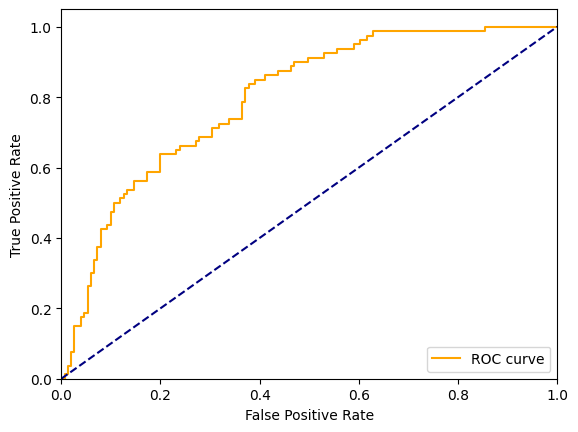

In [183]:
plt.figure()
plt.plot(fpr, tpr, color='orange', label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

**Evaluation**

Accuracy

In [184]:
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f'Accuracy for Naive Bayes: {accuracy_nb}')

Accuracy for Naive Bayes: 0.7316017316017316


The model has correctly predicted 73% of all cases. In other words, out of every 100 test cases, the model has accurately identified 73 cases as either diabetic or non-diabetic.



Confusion Matrix

In [186]:
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print(conf_matrix_nb)


[[118  33]
 [ 29  51]]


118 instances were correctly predicted as non-diabetic.

33 instances were incorrectly predicted as diabetic when they were actually non-diabetic.

29 instances were incorrectly predicted as non-diabetic when they were actually diabetic.

51 instances were correctly predicted as diabetic.

**Specificity** = 0.78145695

When the model predicts that a patient does not have diabetes, it is correct about 78.1% of the time.


Classification Report

In [188]:
class_report_nb = classification_report(y_test, y_pred_nb)
print(class_report_nb)


              precision    recall  f1-score   support

           0       0.80      0.78      0.79       151
           1       0.61      0.64      0.62        80

    accuracy                           0.73       231
   macro avg       0.70      0.71      0.71       231
weighted avg       0.73      0.73      0.73       231



- for class 0 (non-diabetic) shows:

 **Precision** is approximately 80%, which is relatively high. This indicates that when the model predicts an instance as non-diabetic, it's likely to be correct.

 **Recall** is about 78%, suggesting that the model has correctly identified approximately three-quarters of the actual non-diabetic cases.

 The **F1-Score** is around 79%, which reflects a good balance between precision and recall for this class.

- For class 1 (diabetic):

 **Precision** drops to around 61%, indicating the model is less accurate when identifying diabetic cases.

 **Recall** stands at about 64%, showing that the model has correctly identified most of the actual diabetic cases, although it's slightly lower than non-diabetic case identification.

 **F1-Score** is about 62%, indicating a somewhat less balanced performance between precision and recall compared to class 0.

 **Overall accuracy** is roughly 73%, highlighting the general effectiveness of the model in classifying diabetes cases correctly. It means that the model has accurately classified around 73% of all instances.